In [1]:
%matplotlib notebook
import os
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math 

from tools import tools, data_tools, mc_tools

# The initial value for flight path length, which is the distance of local electrod to detector 
flightPathLength = 105.35 # mm 
# The initial value for t_0
t0 = 68.48 # ns

$$\textbf{You can specify which dataset to use in below block}$$

In [2]:
# filename = './data/AL_data_b_cropped.h5'
filename = './data/OLO_AL_6_data_cropped.h5'
# filename = './data/OLO_W_6_data_cropped.h5'
# filename = './data/OLO_Ni_8_data_cropped.h5'
# filename = './data/X6Cr17_2V30Min_5_data_cropped.h5'


head, tail = os.path.split(filename)
figname = os.path.splitext(tail)[0]

data = data_tools.read_hdf5_through_pandas(filename)
print(data)

dld_highVoltage = data['dld/high_voltage'].to_numpy()
dld_pulseVoltage = data['dld/pulse_voltage'].to_numpy()
dld_startCounter = data['dld/start_counter'].to_numpy()
dld_t = data['dld/t'].to_numpy()
dld_x = data['dld/x'].to_numpy()
dld_y = data['dld/y'].to_numpy()

         dld/high_voltage  dld/pulse_voltage  dld/start_counter        dld/t  \
0             5229.481445        5229.481445            44078.0  4320.574290   
1             5229.481445        5229.481445            44557.0   641.243574   
2             5229.481445        5229.481445            44661.0   626.011956   
3             5229.481445        5229.481445            44715.0   628.652286   
4             5229.481445        5229.481445            45774.0   634.776480   
...                   ...                ...                ...          ...   
1909557       5708.995117        5708.995117            38530.0   607.378770   
1909558       5708.995117        5708.995117            38825.0   613.571544   
1909559       5708.995117        5708.995117            39570.0   601.151706   
1909560       5708.995117        5708.995117            40260.0   604.498410   
1909561       5708.995117        5708.995117            40610.0   599.581224   

             dld/x      dld/y  
0      

$\mathbf{\text{calculate the mc in two mode:}}$<br>
$$\frac{m}{n} = k V_{dc}(\frac{t + t_{0}}{d})^{2} $$<br>

$$\frac{m}{n} = k\alpha (V_{dc} + \beta V_{pulse})(\frac{t + t_{0}}{d})^{2} $$<br>

In [ ]:
# t0
dld_t = dld_t - t0

$$\textbf{Below plotted graph offers peak selection. You can select relevant peaks you want for computation.}$$

<IPython.core.display.Javascript object>


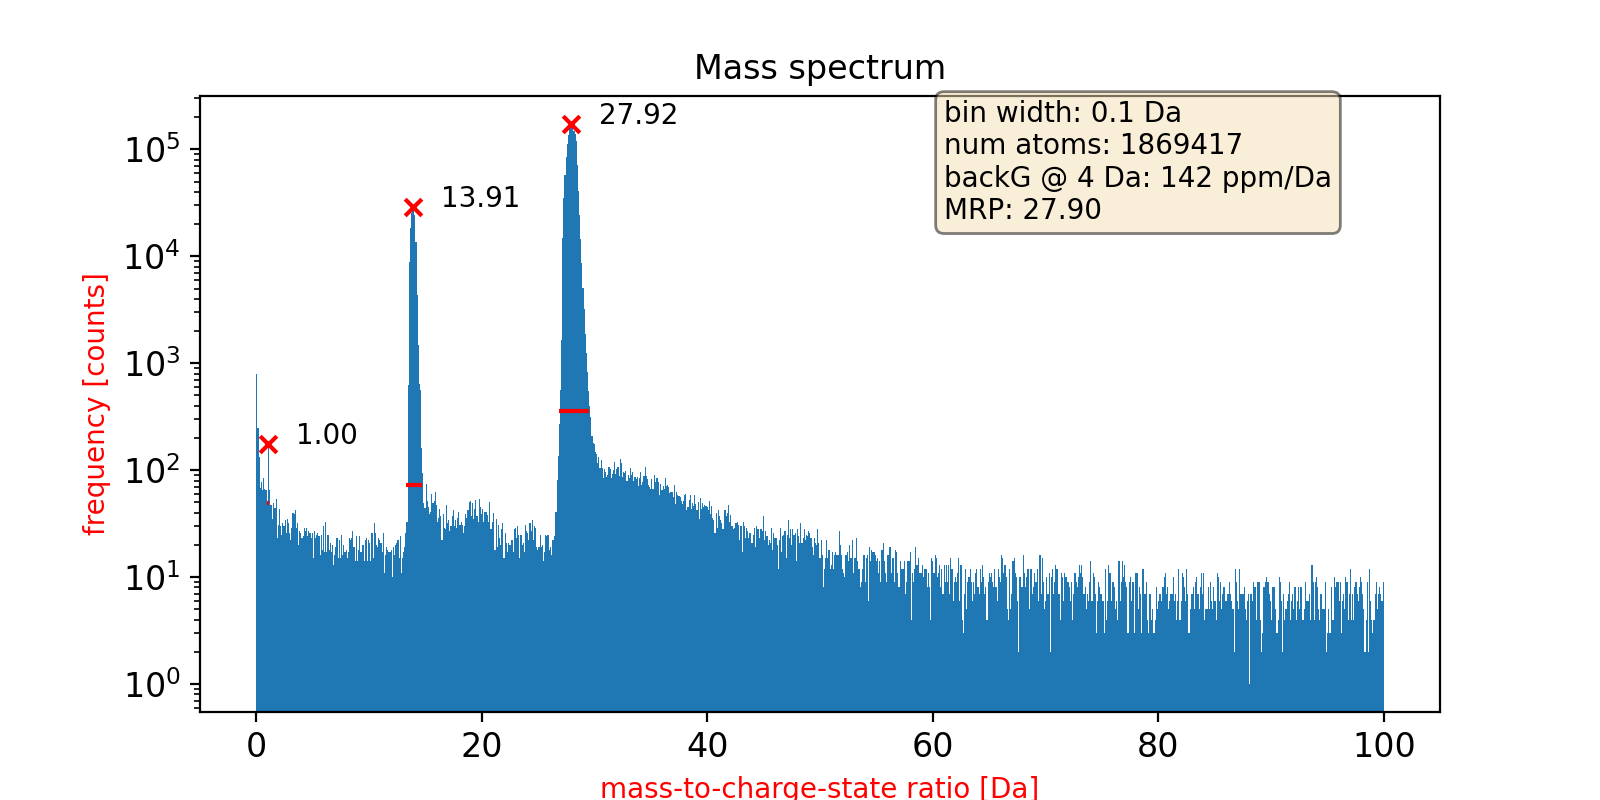

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [27.9]
Peaks  0 is: 1.00 peak window sides are: 0.90 - 1.10
Peaks  1 is: 13.91 peak window sides are: 13.51 - 14.11
Peaks  2 is: 27.92 peak window sides are: 27.42 - 28.42


In [3]:
mc_seb = mc_tools.tof2mc(dld_t, 0, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength, mode='voltage_pulse')
max_hist_ini, left_right_peaks, peaks_sides, max_paek_edges_ini = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, prominence=100, text_loc='right', percent=50, plot=True)
mrp = (max_hist_ini / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))

$$\textbf{Details of selected peaks is displayed below}$$

In [ ]:
print('################ Before starting the calibration ################')
print('Maximum pick value:', max_hist_ini, 'right-left side of the peak:', left_right_peaks)
mrp = (max_hist_ini / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))
print('#################################################################')

$$\textbf{User can specify the dimension of detector square.}$$
$$\textbf {Detector square will decide the area of focus from the centre to get accurate data}$$

$$\textbf{The graphs shows plot of electrons position and its corresponding time of flight for selected region}$$

In [ ]:
# use mask_equal to have equal number of ions for each peak
# only peak the value in the center of detector 4mm * 4mm
detector_squre = 2

mask_tmp_middle = np.logical_and((np.abs(dld_x) < detector_squre), (np.abs(dld_y) < detector_squre))

dld_x_masked = dld_x[mask_tmp_middle]
dld_y_masked = dld_y[mask_tmp_middle]
dld_t_masked = dld_t[mask_tmp_middle]
dld_highVoltage_masked = dld_highVoltage[mask_tmp_middle]
dld_pulseVoltage_masked = dld_pulseVoltage[mask_tmp_middle]


fig1, ax1 = plt.subplots(figsize=(8, 4))
x = plt.scatter(dld_x_masked[dld_t_masked<1000], dld_t_masked[dld_t_masked<1000], color="blue", label='X', alpha=0.1)
y = plt.scatter(dld_y_masked[dld_t_masked<1000], dld_t_masked[dld_t_masked<1000], color="red", label='Y', alpha=0.1)
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=10)
ax1.set_xlabel("position (mm)", color="red", fontsize=10)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.legend(handles=[x, y], loc='upper right')
# plt.savefig('tof_position' + "%s.png" %figname, format="png", dpi=600)
plt.show()

$$\textbf{Graph displays peaks of selected regions}$$

In [ ]:
max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges_tof = tools.massSpecPlot(dld_t_masked[dld_t_masked<1000], 0.1, percent=50, plot=True, prominence=10, distance=200, text_loc='left')

print('################ Before starting the colibration ################')
print('Maximum pick value:', max_hist_tof, 'right-left side of the peak:', left_right_peaks_tof)
mrp = (max_hist_tof / (left_right_peaks_tof[1] - left_right_peaks_tof[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides_tof)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides_tof[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides_tof[i,2], peaks_sides_tof[i,3]))
print('#################################################################')

In [ ]:

# mask of highest peak
mask_vc_peak = np.logical_and((max_paek_edges_tof[0] < dld_t_masked), (dld_t_masked < max_paek_edges_tof[1]))

# tools.massSpecPlot(mc_vc[mc_vc < 100], 0.1, prominence=100, text_loc='right', percent=50, plot=True)


dld_highVoltage_peak = dld_highVoltage_masked[mask_vc_peak]
dld_pulseVoltage_peak = dld_pulseVoltage_masked[mask_vc_peak]
dld_x_peak = dld_x_masked[mask_vc_peak]
dld_y_peak = dld_y_masked[mask_vc_peak] 
dld_t_peak = dld_t_masked[mask_vc_peak]


In [ ]:
max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges_tof = tools.massSpecPlot(dld_t_peak, 0.1, percent=50, plot=True, prominence=10, distance=200, text_loc='left')

print('################ Before starting the colibration ################')
print('Maximum pick value:', max_hist_tof, 'right-left side of the peak:', left_right_peaks_tof)
mrp = (max_hist_tof / (left_right_peaks_tof[1] - left_right_peaks_tof[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides_tof)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides_tof[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides_tof[i,2], peaks_sides_tof[i,3]))
print('#################################################################')

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8, 4))
x = plt.scatter(dld_highVoltage_peak, dld_t_peak, color="blue", label='X', alpha=0.1)
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=10)
ax1.set_xlabel("Voltage (V)", color="red", fontsize=10)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.savefig('center_' + "%s.png" %figname, format="png", dpi=1200)
plt.show()

In [ ]:
# mc_temp = np.copy(mc_seb)
# # mask of highest peak
# mask_vc_tmp = np.logical_and((max_paek_edges[0] < mc_seb), (mc_seb < max_paek_edges[1]))
# mc_vc = mc_temp[mask_vc_tmp]
# mc_vc_ideal = mc_temp[mask_vc_tmp]
# mc_vc_ideal[:] = peaks_sides[1,0]
# # tools.massSpecPlot(mc_vc[mc_vc < 100], 0.1, prominence=100, text_loc='right', percent=50, plot=True)


# dld_highVoltage_vc = dld_highVoltage[mask_vc_tmp]
# dld_pulseVoltage_vc = dld_pulseVoltage[mask_vc_tmp]
# dld_x_vc = dld_x[mask_vc_tmp]
# dld_y_vc = dld_y[mask_vc_tmp] 
# dld_t_vc = dld_t[mask_vc_tmp]
# d_vc = np.sqrt(dld_x_vc**2 + dld_y_vc**2 + flightPathLength**2)

# detector_squre = 2
# mask_tmp_middle = np.logical_and((np.abs(dld_x_vc) < detector_squre), (np.abs(dld_y_vc) < detector_squre))

# dld_highVoltage_vc = dld_highVoltage_vc[mask_tmp_middle]
# dld_pulseVoltage_vc = dld_pulseVoltage_vc[mask_tmp_middle]
# dld_x_vc = dld_x_vc[mask_tmp_middle]
# dld_y_vc = dld_y_vc[mask_tmp_middle]
# dld_t_vc = dld_t_vc[mask_tmp_middle]
# d_vc = d_vc[mask_tmp_middle]

In [ ]:

# mc_seb = mc_tools.tof2mc(dld_t_vc, 0, dld_highVoltage_vc, dld_pulseVoltage_vc, dld_x_vc, dld_y_vc, flightPathLength, mode='voltage_pulse')
# max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, prominence=100, text_loc='right', percent=50, plot=True)
# mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
# print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
# for i in range(len(peaks_sides)):
#     print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))

In [ ]:
# max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges_tof = tools.massSpecPlot(dld_t_vc, 0.1, percent=50, plot=True, prominence=100, distance=1000, text_loc='left')

# print('################ Before starting the colibration ################')
# print('Maximum pick value:', max_hist_tof, 'right-left side of the peak:', left_right_peaks_tof)
# mrp = (max_hist_tof / (left_right_peaks_tof[1] - left_right_peaks_tof[0]))
# print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
# for i in range(len(peaks_sides_tof)):
#     print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides_tof[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides_tof[i,2], peaks_sides_tof[i,3]))
# print('#################################################################')

In [ ]:
def tof_correction(t, vdc):
    t_corr_m = np.zeros(0)
    i = 0
    leanth = len(t)
    while i < leanth:
        v_i = vdc[i]
        t_corr_m_tmp = np.zeros(0)
        indexes = np.zeros(0, dtype=int)
        for j in range(leanth):
            if i+j > leanth-1:
                break
            elif vdc[i+j] == v_i:
                indexes = np.append(indexes, i+j)
            else:
                break
        # indexes = np.where(dld_highVoltage_vc == v_i)
        t_corr_m_tmp = t[indexes]
        mean = np.median(t_corr_m_tmp)
        t_corr_m = np.append(t_corr_m, np.tile(mean, len(indexes)))
        i = i + len(indexes)
    return t_corr_m

t_corr_m = tof_correction(dld_t_peak, dld_highVoltage_peak)


In [ ]:
fig1, ax1 = plt.subplots(figsize=(8, 4))



# fig1, ax1 = plt.subplots(figsize=(8, 4))
x = plt.scatter(dld_highVoltage_peak, dld_t_peak, color="blue", label='Ions', alpha=0.1)

t_corr = np.sqrt(((flightPathLength*1E-3)**2 * np.tile(np.array(29.98), len(dld_highVoltage_peak))*1.66E-27)/(2 * 1.6E-19 * dld_highVoltage_peak))
y = plt.scatter(dld_highVoltage_peak, t_corr*1E9, color="red", label='Ions_f_corected', alpha=0.1)


ax1.set_xlabel("Voltage (V)", color="red", fontsize=20)
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=20)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.legend(handles=[x, y], loc='upper right')
plt.show()


fig1, ax1 = plt.subplots(figsize=(8, 4))

# fig1, ax1 = plt.subplots(figsize=(8, 4))
x = plt.scatter(dld_highVoltage_peak, dld_t_peak, color="blue", label='Ions', alpha=0.1)


z = plt.scatter(dld_highVoltage_peak, t_corr_m, color="green", label='Ions_m_corected', alpha=0.1)

ax1.set_xlabel("Voltage (V)", color="red", fontsize=20)
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=20)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.legend(handles=[x, z], loc='upper right')


plt.show()

In [ ]:

# mc_seb = mc_tools.tof2mc(t_corr*1E9, 0, dld_highVoltage_peak, dld_pulseVoltage_vc, dld_x_peak, dld_y_peak, flightPathLength, mode='voltage_pulse')
# max_hist, left_right_peaks, peaks_sides, max_paek_edges = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, prominence=100, text_loc='right', percent=50, plot=True)
# mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
# print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
# for i in range(len(peaks_sides)):
#     print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))

In [ ]:
ionsPerFitSegment = 100
numAtom = len(dld_t_peak)
numMcBins = math.floor(numAtom / ionsPerFitSegment)
binLimitsIdx = np.round(np.linspace(0, numAtom - 1, numMcBins + 1))
# binCenters = np.round((binLimitsIdx[1:] + binLimitsIdx[0:-1]) / 2)
pkLoc = np.zeros(0)
# limits = np.zeros((numMcBins, 2))
VDC = np.zeros(0)
for i in range(numMcBins):
    # limits[i, :] = [data[int(binLimitsIdx[i]), 0], data[int(binLimitsIdx[i + 1]), 0]]
    mask = np.logical_and((dld_highVoltage_peak > dld_highVoltage_peak[int(binLimitsIdx[i])]),
                                         (dld_highVoltage_peak < dld_highVoltage_peak[int(binLimitsIdx[i + 1])]))
    mcBin = dld_t_peak[mask]
#     mcBin = mcBin[np.logical_and(mcBin > fitPeak[0], mcBin < fitPeak[1])]

    # for cases that the mcBin contains nothing
    # Based on ionsPerFitSegment, sth the mcBin = []
    if len(mcBin) == 0:
        pass
    else:
        pkLoc = np.append(pkLoc, np.median(mcBin))
        VDC = np.append(VDC, np.mean(dld_highVoltage_peak[np.array(mask)]))

corr = pkLoc / pkLoc[0]

In [ ]:
def voltage_corr(x, a, b, c):
    return a / np.sqrt((b + x + c * x**2))

def voltage_corection(highVoltage, t):
    # t = (a_0/a_1 + v + a_2*v)(m/n * flighPathLenth**2 / 2e)

    #     return a * (x ** 2) + b * x + c



#     fitresult, _ = curve_fit(voltage_corr, highVoltage, t/(t_corr*1E9))
    fitresult, _ = curve_fit(voltage_corr, highVoltage,  t/ t_corr_m)
#     fitresult, _ = curve_fit(voltage_corr, highVoltage,  np.mean(t) / t_corr_m ) # shayad khob bashad
#     fitresult, _ = curve_fit(voltage_corr, highVoltage, np.mean(t)/t) # shayad khob bashad
#     fitresult, _ = curve_fit(voltage_corr, VDC, corr)
    # values, counts = np.unique(dld_t_vc, return_counts=True)
    # ind = np.argmax(counts)
    # fitresult, _ = curve_fit(voltage_corr, dld_highVoltage_vc,  values[ind]/dld_t_vc)

    a, b, c = fitresult
    
    
    return fitresult

fitresult = voltage_corection(dld_highVoltage_peak, dld_t_peak)
a, b, c = fitresult
f_v =  voltage_corr(dld_highVoltage, a, b, c)

dld_t_new = dld_t * f_v
# max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges_tof = tools.massSpecPlot(dld_t_new, 0.1, percent=50, plot=True, prominence=100, distance=1000, text_loc='right')
# print('################ Before starting the colibration ################')
# print('Maximum pick value:', max_hist_tof, 'right-left side of the peak:', left_right_peaks_tof)
# mrp = (max_hist_tof / (left_right_peaks_tof[1] - left_right_peaks_tof[0]))
# print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
# for i in range(len(peaks_sides_tof)):
#     print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides_tof[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides_tof[i,2], peaks_sides_tof[i,3]))
# print('#################################################################')


In [ ]:
dld_t_masked_new = dld_t_new[mask_tmp_middle]
dld_t_new_peak = dld_t_masked_new[mask_vc_peak]


fig1, ax1 = plt.subplots(figsize=(8, 4))
x = plt.scatter(dld_highVoltage_peak, dld_t_new_peak, color="blue", label='Ions', alpha=0.1)
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=20)
ax1.set_xlabel(" Voltage (V)", color="red", fontsize=20)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
# plt.legend(handles=[x, linear], loc='upper right')
plt.show()

fig1, ax1 = plt.subplots(figsize=(8, 4))
linear, = plt.plot(dld_highVoltage_peak, voltage_corr(dld_highVoltage_peak, a, b, c), '--', color='r', label='Fit_curve' )
ax1.set_ylabel("Correction Factor", color="red", fontsize=20)
ax1.set_xlabel("Voltage (V)", color="red", fontsize=20)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.show()

In [ ]:
mc_seb = mc_tools.tof2mc(dld_t_new, 0, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength, mode='voltage_pulse')

max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, percent=50, plot=True)

print('################ Before starting the colibration ################')
print('Maximum pick value:', max_hist, 'right-left side of the peak:', left_right_peaks)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))
print('#################################################################')

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8, 4))
x = plt.scatter(dld_x[mask_tmp_middle], dld_t[mask_tmp_middle], color="blue", label='X', alpha=0.1)
y = plt.scatter(dld_y[mask_tmp_middle], dld_t[mask_tmp_middle], color="red", label='Y', alpha=0.1)
ax1.set_ylabel("Time of flight (ns)", color="red", fontsize=10)
ax1.set_xlabel("position (mm)", color="red", fontsize=10)
plt.grid(color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.legend(handles=[x, y], loc='upper right')
# plt.savefig('tof_position' + "%s.png" %figname, format="png", dpi=600)
plt.show()

In [ ]:
# mask of highest peak
mask_bowl_peak = np.logical_and((max_paek_edges_ini[0] < dld_t), (dld_t < max_paek_edges_ini[1]))

# tools.massSpecPlot(mc_vc[mc_vc < 100], 0.1, prominence=100, text_loc='right', percent=50, plot=True)


dld_highVoltage_bowl = dld_highVoltage[mask_bowl_peak]
dld_pulseVoltage_bowl = dld_pulseVoltage[mask_bowl_peak]
dld_x_bowl = dld_x[mask_bowl_peak]
dld_y_bowl = dld_y[mask_bowl_peak] 
dld_t_bowl = dld_t[mask_bowl_peak]


In [ ]:
def bowl_corr_fit(data_xy, a, b, c, d, e, f):
    x = data_xy[0]
    y = data_xy[1]
    result = a + b*x + c*y + d*x**2 + e*x*y + f*y**2
    return result
def bowl_correction(dld_x, dld_y, dld_t):

    values, counts = np.unique(dld_t, return_counts=True)
    ind = np.argmax(counts)
#     parameters, covariance = curve_fit(bowl_corr_fit, [dld_x, dld_y],  values[ind]/dld_t)
    parameters, covariance = curve_fit(bowl_corr_fit, [dld_x, dld_y],  dld_t/max_hist_ini)
    return parameters

parameters = bowl_correction(dld_x_bowl, dld_y_bowl, dld_t_bowl)
f_bowl = bowl_corr_fit([dld_x,dld_y], *parameters)
dld_t_new = dld_t * f_bowl

In [ ]:
# create surface function model
# setup data points for calculating surface model
model_x_data = np.linspace(min(dld_x_bowl), max(dld_x_bowl), 30)
model_y_data = np.linspace(min(dld_y_bowl), max(dld_y_bowl), 30)
# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)
# calculate Z coordinate array
Z = bowl_corr_fit(np.array([X, Y]), *parameters)

# setup figure object
fig = plt.figure()
# setup 3d object
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# plot surface
ax.plot_surface(X, Y, Z)
# plot input data
# ax.scatter(detxIn, detyIn, mcIn, color='red')
# set plot descriptions
ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_zlabel('Z data')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

plt.show()

In [ ]:
dld_t_new = dld_t * f_bowl * f_v

In [ ]:
mc_seb = mc_tools.tof2mc(dld_t_new, 0, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength, mode='voltage_pulse')

max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges_tof = tools.massSpecPlot(mc_seb[mc_seb<100], 0.1, percent=50, plot=True)

print('################ Before starting the colibration ################')
print('Maximum pick value:', max_hist, 'right-left side of the peak:', left_right_peaks)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))
print('#################################################################')

In [ ]:
dld_t = dld_t_new